# Spain Wildfires

- Incendios forestales ocurridos en España entre los años 1968 y 2016.
- Estudio realizado sobre un dataset formado por 585400 observaciones y 51 atributos que se describen a continuación.

------------------------------------------------------------------------------------------------------------------------

**1. Data Cleaning and Preprocessing**

A. Data collection from Kaggle API:

*Note: To run all the code from the beginning first REMOVE the file 'incendios.csv' from src folder.

In [2]:
import os
import subprocess
from shutil import copy2
from kaggle.api.kaggle_api_extended import KaggleApi

# Step 1: Move (copy) the kaggle.json file to the correct location
src_path = '/workspaces/Machine-Learning-Final-Project.FGM/.devcontainer/kaggle.json'
dst_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Ensure the .kaggle directory exists and copy the kaggle.json file
os.makedirs(os.path.dirname(dst_path), exist_ok=True)
copy2(src_path, dst_path)

# Set permissions for the kaggle.json file
os.chmod(dst_path, 0o600)

# Step 2: Download the dataset again using Kaggle API
api = KaggleApi()
api.authenticate()

# Define dataset info
dataset_name = 'patrilc/wildfirespain'
zip_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip'
output_dir = './'

# Download dataset
api.dataset_download_files(dataset_name, path=output_dir, unzip=False)

# Step 3: Check if the zip file exists and extract it
if os.path.exists(zip_file_path):
    subprocess.run(['unzip', zip_file_path, '-d', output_dir], check=True)
    print(f"{zip_file_path} successfully extracted to {output_dir}")
else:
    print(f"{zip_file_path} does not exist in the specified path.")

# Step 4: List the contents of the current directory
directory_contents = os.listdir(output_dir)
print("Directory contents after extraction:")
for item in directory_contents:
    print(item)

Dataset URL: https://www.kaggle.com/datasets/patrilc/wildfirespain
Archive:  /workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip
  inflating: ./incendios.csv         
/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip successfully extracted to ./
Directory contents after extraction:
incendios.csv
utils.py
app.py
workflow.csv
explore.ipynb
wildfirespain.zip


In [3]:
import pandas as pd

file_path = "/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv"

wildfires = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

wildfires


/tmp/ipykernel_42003/157735002.py:5: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfires = pd.read_csv(file_path, delimiter=';')


,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,intencionalidad,idcausante,idautorizacionactividad,idclasedia,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum,claseincendio,lugar,combustible,tipodefuego,tipodeataque
0,568679.0,2016,3,NaN,NaN,15,Islas Baleares,7,Islas Baleares,63,39.709,2.622,409.0,1,1.0,10/01/2016,10/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,290,NaN,0.0,1.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,17.0,49.0,20.0,Suroeste,0.20,0.0,20,18,0,31.0,466451.0,4397989.0,2.0,conato,excursionistas,bosques,superficie,directo
1,568680.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,157,42.466,0.695,1213.0,1,1.0,12/01/2016,12/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,1.0,322,NaN,0.0,3.0,1,no_intencionado,1,3.0,laborable,2.0,8.0,0.0,0.0,Norte,0.05,0.0,4,0,0,30.0,800159.0,4713460.0,2.0,conato,vertederos,pas_mat,superficie,directo
2,568681.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,125,42.141,-0.408,483.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,241,NaN,0.0,3.0,1,no_intencionado,1,4.0,festivo,3.0,8.0,40.0,4.0,Noreste,0.23,0.0,9,4,0,30.0,714747.0,4675882.0,2.0,conato,NaN,pastizal,superficie,directo
3,568682.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,52,41.689,0.178,196.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,0.0,0.0,0.0,Norte,0.65,0.0,8,4,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
4,568683.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,197,41.866,-0.461,399.0,1,1.0,22/01/2016,22/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,1,no_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.15,0.0,7,3,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585394,1240141.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,249,39.729,-2.928,775.0,1,1.0,06/10/2016,06/10/2016,tarde,octubre,0,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,7.95,0.0,1,0,0,NaN,NaN,NaN,NaN,incendio,viasferreas,pastizal,superficie,directo
585395,1240142.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,128,39.569,-2.762,735.0,1,1.0,03/10/2016,04/10/2016,noche,octubre,1,VERDADERO,vigilante_fijo,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,1.58,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,pas_res,superficie,directo
585396,1240144.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,102,39.612,-2.281,815.0,1,1.0,03/10/2016,04/10/2016,tarde,octubre,1,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,4.10,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,mat_res,superficie,directo
585397,1240145.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,153,39.485,-2.745,716.0,1,1.0,03/10/2016,03/10/2016,tarde,octubre,0,FALSO,base_cdf,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.86,0.0,4,2,0,NaN,NaN,NaN,NaN,conato,otros,pas_mat,superficie,directo


In [4]:
# Get basic info about the dataset
wildfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585399 entries, 0 to 585398
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   idpif                        585399 non-null  float64
 1   anio                         585399 non-null  int64  
 2   idestadopif                  585399 non-null  int64  
 3   probabilidadignicion         489389 non-null  float64
 4   idpeligro                    579862 non-null  float64
 5   idcomunidad                  585399 non-null  int64  
 6   comunidad                    585399 non-null  object 
 7   idprovincia                  585399 non-null  int64  
 8   provincia                    585399 non-null  object 
 9   idmunicipio                  585399 non-null  int64  
 10  latitud                      514051 non-null  float64
 11  longitud                     514051 non-null  float64
 12  altitud                      514051 non-null  float64
 13 

In [ ]:
# Summary statistics
wildfires.describe()

,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,idprovincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,duracion,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,idcausante,idautorizacionactividad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum
count,5.853990e+05,585399.000000,585399.000000,489389.000000,579862.000000,585399.000000,585399.000000,585399.000000,514051.000000,514051.000000,514051.000000,585399.000000,6414.000000,585399.000000,6414.000000,585399.000000,302248.000000,9262.000000,6414.000000,585399.000000,585399.000000,6414.000000,206416.000000,282064.000000,277034.000000,262184.000000,585399.000000,6417.000000,585399.000000,585399.000000,585399.000000,220590.000000,2.205470e+05,2.205850e+05,3926.000000
mean,8.659738e+05,1997.324696,3.984993,15.044114,1.503778,6.791136,27.064163,65.697951,41.585214,-5.746319,447.324412,1.007296,1.148269,0.196531,2.779701,384.069342,409.132745,0.436623,1.604927,1.770384,1.886448,3.438572,14.609342,22.310227,52.931961,14.951481,12.767913,0.023064,27.764579,6.502818,1.813515,29.474559,5.165553e+05,4.609158e+06,2.028528
std,1.693967e+05,10.883810,0.121833,23.029899,0.873342,5.275141,11.840965,92.213738,1.991222,3.020347,321.710537,0.126325,1.234667,0.756895,1.006274,103.158710,25.077332,2.642960,0.918721,0.420586,0.317266,0.795600,20.132597,10.679793,20.174491,14.384499,155.310767,0.173253,243.440053,41.380794,13.821138,0.631843,1.453164e+05,2.409668e+05,0.290313
min,5.686790e+05,1968.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.756000,-17.998000,1.000000,1.000000,1.000000,0.000000,1.000000,100.000000,400.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.140600e+04,3.060500e+04,2.000000
25%,7.194475e+05,1990.000000,4.000000,0.000000,1.000000,3.000000,15.000000,15.000000,40.720000,-8.016000,158.000000,1.000000,1.000000,0.000000,2.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,17.000000,39.000000,5.000000,0.100000,0.000000,5.000000,0.000000,0.000000,29.000000,4.270655e+05,4.537110e+06,2.000000
50%,8.658160e+05,1998.000000,4.000000,0.000000,1.000000,4.000000,32.000000,43.000000,42.234000,-6.552000,431.000000,1.000000,1.000000,0.000000,3.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,4.000000,9.000000,22.000000,53.000000,10.000000,0.700000,0.000000,9.000000,3.000000,0.000000,29.000000,5.476480e+05,4.673165e+06,2.000000
75%,1.012180e+06,2005.000000,4.000000,30.000000,2.000000,11.000000,36.000000,80.000000,42.866000,-4.182000,677.000000,1.000000,1.000000,0.000000,3.000000,400.000000,402.000000,0.000000,3.000000,2.000000,2.000000,4.000000,18.000000,28.000000,68.000000,20.000000,3.000000,0.000000,18.000000,5.000000,0.000000,30.000000,6.169630e+05,4.733550e+06,2.000000
max,1.240186e+06,2016.000000,4.000000,100.000000,4.000000,18.000000,51.000000,999.000000,43.740000,4.290000,1695.000000,21.000000,84.000000,153.000000,5.000000,600.000000,499.000000,85.000000,3.000000,2.000000,2.000000,4.000000,1430.000000,2132.000000,254.000000,250.000000,28879.100000,2.000000,82320.000000,8520.000000,3264.000000,71.000000,6.557209e+06,4.664850e+07,5.000000


In [6]:
def column_summary(wildfires):
    summary_data = []
    
    for col_name in wildfires.columns:
        col_dtype = wildfires[col_name].dtype
        num_of_nulls = wildfires[col_name].isnull().sum()
        num_of_non_nulls = wildfires[col_name].notnull().sum()
        num_of_distinct_values = wildfires[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = wildfires[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = wildfires[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_wildfires = pd.DataFrame(summary_data)
    return summary_wildfires

# Assuming wildfires is your DataFrame
summary_wildfires = column_summary(wildfires)
display(summary_wildfires)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,comunidad,object,0,585399,18,"{'Galicia': 253477, 'Castilla y Leon': 71775, ..."
7,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
8,provincia,object,0,585399,51,"{'Pontevedra': 79222, 'Ourense': 77598, 'A Cor..."
9,idmunicipio,int64,0,585399,478,"{0: 67038, 34: 8966, 11: 8276, 50: 7889, 9: 76..."


In this first step will reduce the number of columns to simplify the dataset and also reduce the file size down. In this first step will eliminate the followiong columns:
'comunidad', 'provincia', 'numminicipiosafectados', 'extinguido', 'mesdeteccion', 'primeranotificacion112', 'iddatum'.

The dataset generated will be 'incendios.v1' :

In [7]:
import os

# List of columns to remove
columns_to_remove = [
    'comunidad', 
    'provincia', 
    'nummunicipiosafectados', 
    'extinguido', 
    'mesdeteccion', 
    'primeranotificaciondesde112', 
    'iddatum'
]

# Remove the columns
wildfires_v1 = wildfires.drop(columns=columns_to_remove)

# Save the modified dataset back to the original file
file_path = 'incendios.csv'
wildfires_v1.to_csv(file_path, index=False)

# Display the new file size (optional)
print(f"Updated file size: {os.path.getsize(file_path) / (1024 * 1024):.2f} MB")

wildfires_v1.shape



Updated file size: 117.93 MB


(585399, 44)

Now, will remove redundant information held in the other variables.
For this purpose, will review and simplify the group of variables: 'idcausa', 'idmotivacion', 'idcertidumbrecausa', 'idcausante', and 'intencionalidad'.

1. The variable 'idcausa' provides information that is held in 'idmotivacion', so the next step will be creating a binary column to descrive intencionality (0 , 1), called 'intencionado'.
2. Remove 'idcausa'.
3. Remove 'idcertidumbrecausa'.
4. Remove 'intencionalidad', given yhe it contains information irrelevant for the study and reduntant present in 'intencionado'.


In [8]:
import os

# Create binary column for intentional wildfires
wildfires_v1['intencionado'] = wildfires_v1['idcausa'].apply(lambda x: 1 if 400 <= x <= 499 else 0)

# Drop redundant columns
columns_to_remove = ['idcausa', 'idcertidumbrecausa', 'intencionalidad']
wildfires_v2 = wildfires_v1.drop(columns=columns_to_remove)

# Overwrite the original dataset file
file_path = 'incendios.csv'
wildfires_v2.to_csv(file_path, index=False)

# Display the new file size (optional)
print(f"Updated file size: {os.path.getsize(file_path) / (1024 * 1024):.2f} MB") 

wildfires_v2.shape


Updated file size: 103.76 MB


(585399, 42)

The dataset file is downsizing!!

Now, the last simplification will be reviewing the variables corresponding to the different coordinates:

- Given that the coordinates expresed as lat/long are much more popular and used in GIS, environmental projects and special datasets will remove the redundant UTM coordinates: 'huso', 'x', 'y'.

- Also, given taht the coordinates describe the geographical location of the fires, the variable 'municipio' can also be removed.

In [9]:
import os

# Choose columns to remove based on preference
columns_to_remove = ['idmunicipio', 'huso', 'x', 'y']  # Keep lat/long and altitud

# Drop selected columns
incendios_reduced = wildfires_v2.drop(columns=columns_to_remove)

# Overwrite the original dataset file
file_path = 'incendios.csv'
incendios_reduced.to_csv(file_path, index=False)

# Display the new file size (optional)
print(f"Updated file size: {os.path.getsize(file_path) / (1024 * 1024):.2f} MB")

incendios_reduced.shape

Updated file size: 96.00 MB


(585399, 38)

- Checking for duplicates:

In [10]:
# Identify duplicate rows in the 'incendios_reduced' dataset
duplicates = incendios_reduced[incendios_reduced.duplicated()]

# Print the number of duplicate rows and display a preview
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates.head())

incendios_reduced.shape

Number of duplicate rows: 0
Empty DataFrame
Columns: [idpif, anio, idestadopif, probabilidadignicion, idpeligro, idcomunidad, idprovincia, latitud, longitud, altitud, puntosinicioincendio, deteccion, horadeteccion, duracion, iddetectadopor, idgradoresponsabilidad, idmotivacion, diastormenta, idinvestigacioncausa, idcausante, idautorizacionactividad, idclasedia, diasultimalluvia, tempmaxima, humrelativa, velocidadviento, direccionviento, perdidassuperficiales, idnivelgravedadmaximo, numeromediospersonal, numeromediospesados, numeromediosaereos, claseincendio, lugar, combustible, tipodefuego, tipodeataque, intencionado]
Index: []


(585399, 38)

- Checking for missing values:

In [11]:
import pandas as pd

# Check for missing values in the incendios_reduced dataframe
missing_values = incendios_reduced.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_reduced)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_reduced.shape

                         Missing Values  Percentage Missing
idpif                                 0            0.000000
anio                                  0            0.000000
idestadopif                           0            0.000000
probabilidadignicion              96010           16.400780
idpeligro                          5537            0.945851
idcomunidad                           0            0.000000
idprovincia                           0            0.000000
latitud                           71348           12.187927
longitud                          71348           12.187927
altitud                           71348           12.187927
puntosinicioincendio             578985           98.904337
deteccion                             0            0.000000
horadeteccion                         0            0.000000
duracion                              0            0.000000
iddetectadopor                        0            0.000000
idgradoresponsabilidad           578985 

(585399, 38)

In [12]:
# Identify columns to drop due to high percentage of missing values
columns_to_drop = [
    'puntosinicioincendio', 'idgradoresponsabilidad', 'idmotivacion', 
    'diastormenta', 'idinvestigacioncausa', 'idautorizacionactividad', 
    'diasultimalluvia', 'tempmaxima', 'humrelativa', 
    'velocidadviento', 'direccionviento', 'idnivelgravedadmaximo'
]

# Drop the specified columns
incendios_reduced = incendios_reduced.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset back to the same file path
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendios_reduced.csv'
incendios_reduced.to_csv(file_path, index=False)

# Print a confirmation message
print("Columns with high missing values removed successfully.")

incendios_reduced.shape

Columns with high missing values removed successfully.


(585399, 26)

In [13]:

# Check for missing values in the incendios_reduced dataframe
missing_values = incendios_reduced.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_reduced)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_reduced.shape

                       Missing Values  Percentage Missing
idpif                               0            0.000000
anio                                0            0.000000
idestadopif                         0            0.000000
probabilidadignicion            96010           16.400780
idpeligro                        5537            0.945851
idcomunidad                         0            0.000000
idprovincia                         0            0.000000
latitud                         71348           12.187927
longitud                        71348           12.187927
altitud                         71348           12.187927
deteccion                           0            0.000000
horadeteccion                       0            0.000000
duracion                            0            0.000000
iddetectadopor                      0            0.000000
idcausante                          0            0.000000
idclasedia                          0            0.000000
perdidassuperf

(585399, 26)

Review of the reduced dataset 'incendios_reduced':

In [14]:
def column_summary(incendios_reduced):
    summary_data = []
    
    for col_name in incendios_reduced.columns:
        col_dtype = incendios_reduced[col_name].dtype
        num_of_nulls = incendios_reduced[col_name].isnull().sum()
        num_of_non_nulls = incendios_reduced[col_name].notnull().sum()
        num_of_distinct_values = incendios_reduced[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios_reduced[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios_reduced[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_wildfires = pd.DataFrame(summary_data)
    return summary_wildfires

# Assuming wildfires is your DataFrame
summary_wildfires = column_summary(incendios_reduced)
display(summary_wildfires)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
7,latitud,float64,71348,514051,4295,"{43.348: 4644, 42.213: 3963, 42.061: 3855, 42...."
8,longitud,float64,71348,514051,5389,"{-8.273: 4208, -7.972: 3324, -8.644: 3308, -8...."
9,altitud,float64,71348,514051,1361,"{10.0: 5353, 568.0: 5085, 7.0: 4944, 6.0: 4497..."


Management of the remaining missing data:

- The large misisng data variables have been removed in previous steps.
- Now will Impute Missing Numerical Data:
            - For numerical columns: probabilidadignicion, perdidasuperficiales, using mean or median for imputation.

In [15]:
# Impute missing numerical columns with median

numerical_imputation = ['probabilidadignicion', 'latitud', 'longitud', 'altitud', 'idpeligro']
for col in numerical_imputation:
    incendios_reduced[col] = incendios_reduced[col].fillna(incendios_reduced[col].median())

# Impute missing categorical columns with mode

categorical_imputation = ['lugar', 'combustible', 'tipodefuego', 'tipodeataque']
for col in categorical_imputation:
    incendios_reduced[col] = incendios_reduced[col].fillna(incendios_reduced[col].mode()[0])

In [17]:
def column_summary(incendios_reduced):
    summary_data = []
    
    for col_name in incendios_reduced.columns:
        col_dtype = incendios_reduced[col_name].dtype
        num_of_nulls = incendios_reduced[col_name].isnull().sum()
        num_of_non_nulls = incendios_reduced[col_name].notnull().sum()
        num_of_distinct_values = incendios_reduced[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios_reduced[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios_reduced[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_wildfires = pd.DataFrame(summary_data)
    return summary_wildfires

# Assuming wildfires is your DataFrame
summary_wildfires = column_summary(incendios_reduced)
display(summary_wildfires)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,0,585399,99,"{0.0: 405081, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,0,585399,5,"{1.0: 336938, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
7,latitud,float64,0,585399,4295,"{42.234: 74061, 43.348: 4644, 42.213: 3963, 42..."
8,longitud,float64,0,585399,5389,"{-6.552: 74120, -8.273: 4208, -7.972: 3324, -8..."
9,altitud,float64,0,585399,1361,"{431.0: 72331, 10.0: 5353, 568.0: 5085, 7.0: 4..."


**Analysis of univariate variables**

- Analysis of categorical variables

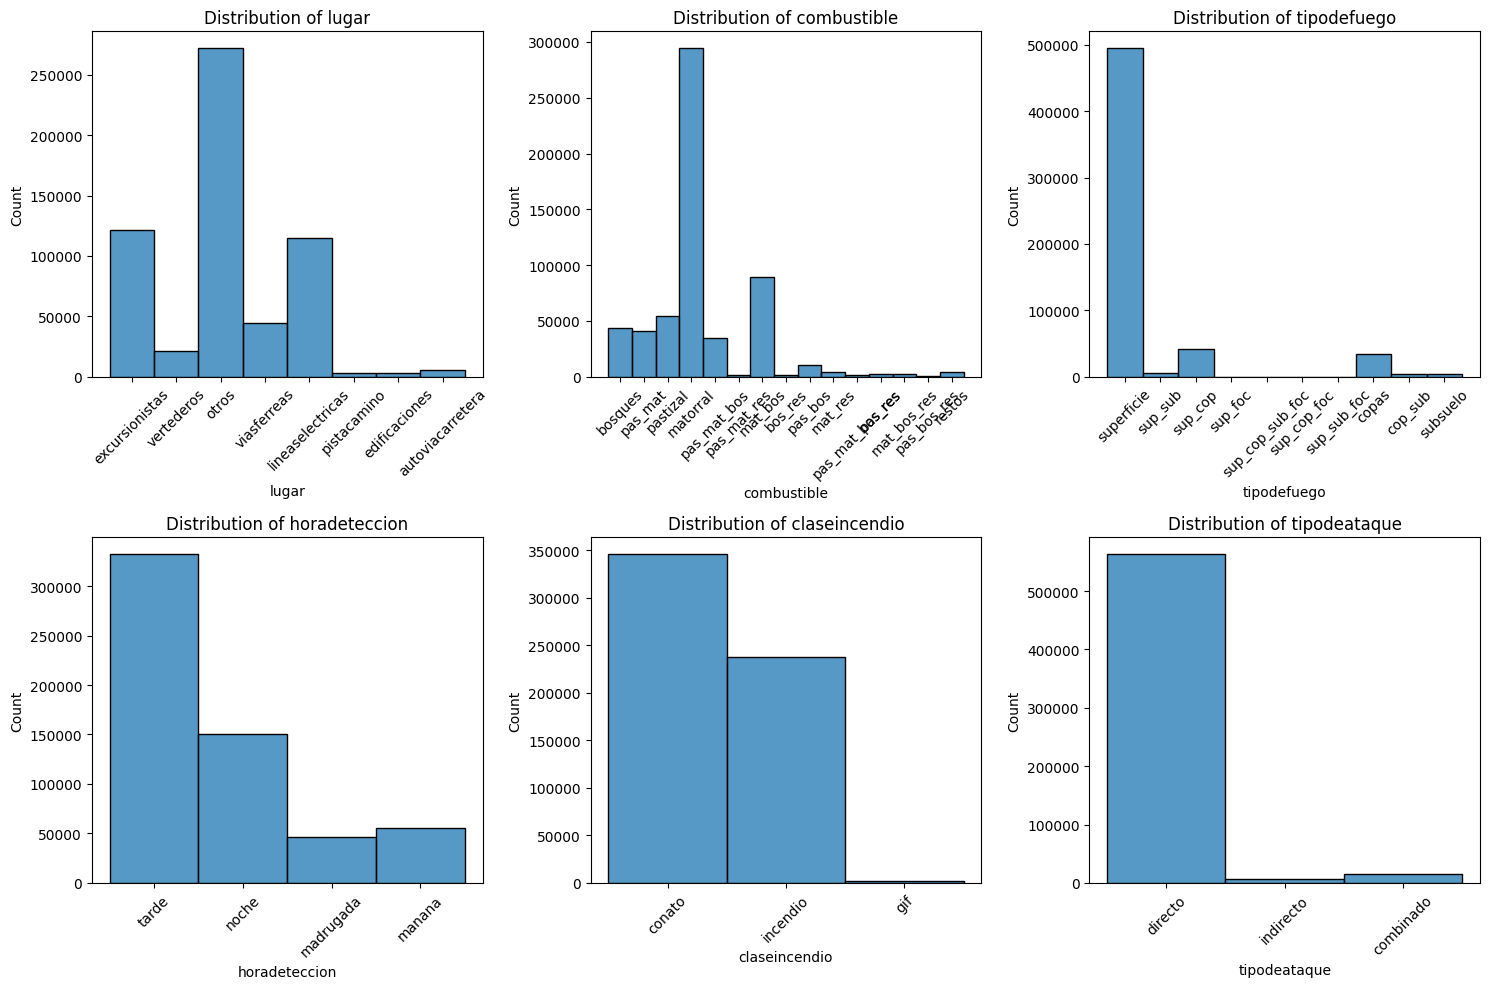

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical variables to analyze
categorical_vars = ['lugar', 'combustible', 'tipodefuego', 'horadeteccion', 'claseincendio', 'tipodeataque','idclasedia','iddetectadopor']

# Create subplots
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

# Loop through the variables and plot
for ax, var in zip(axis.flatten(), categorical_vars):
    sns.histplot(data=incendios_reduced, x=var, ax=ax, kde=False)
    ax.set_title(f"Distribution of {var}")
    ax.set_ylabel("Count")
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Observations & Brief Conclusions:

-lugar (Place): The data shows significant variability, with a few places having noticeably higher frequencies. This could indicate hotspots for forest fires. These places are: Areas de excursionistas, vías férreas o líneas eléctricas.

-combustible (Fuel): A small number of fuel types dominate, being 'pastizal' the most commun originating the fires way above any other tipe of combustible. This might reflect common vegetation types or materials contributing to fires in the region.

-tipodefuego (Fire Type): Wildfires in 'superficie' are the most common, probably reflecting favorable environmental conditions.

-horadetecion (Hour of Detection): Peaks around 'tarde', suggest most of the detections times happen at this time. However, this may suggest that the lag of light favours the observation of fires.

-claseincendio (Class of Fire): Classes like "conato" and "incendio" may represent different levels of severity, with one being significantly more frequent.

-idcausante (Cause ID): Most of cases the iniciator of the fire is not identified.

- Analysis on numeric variables:


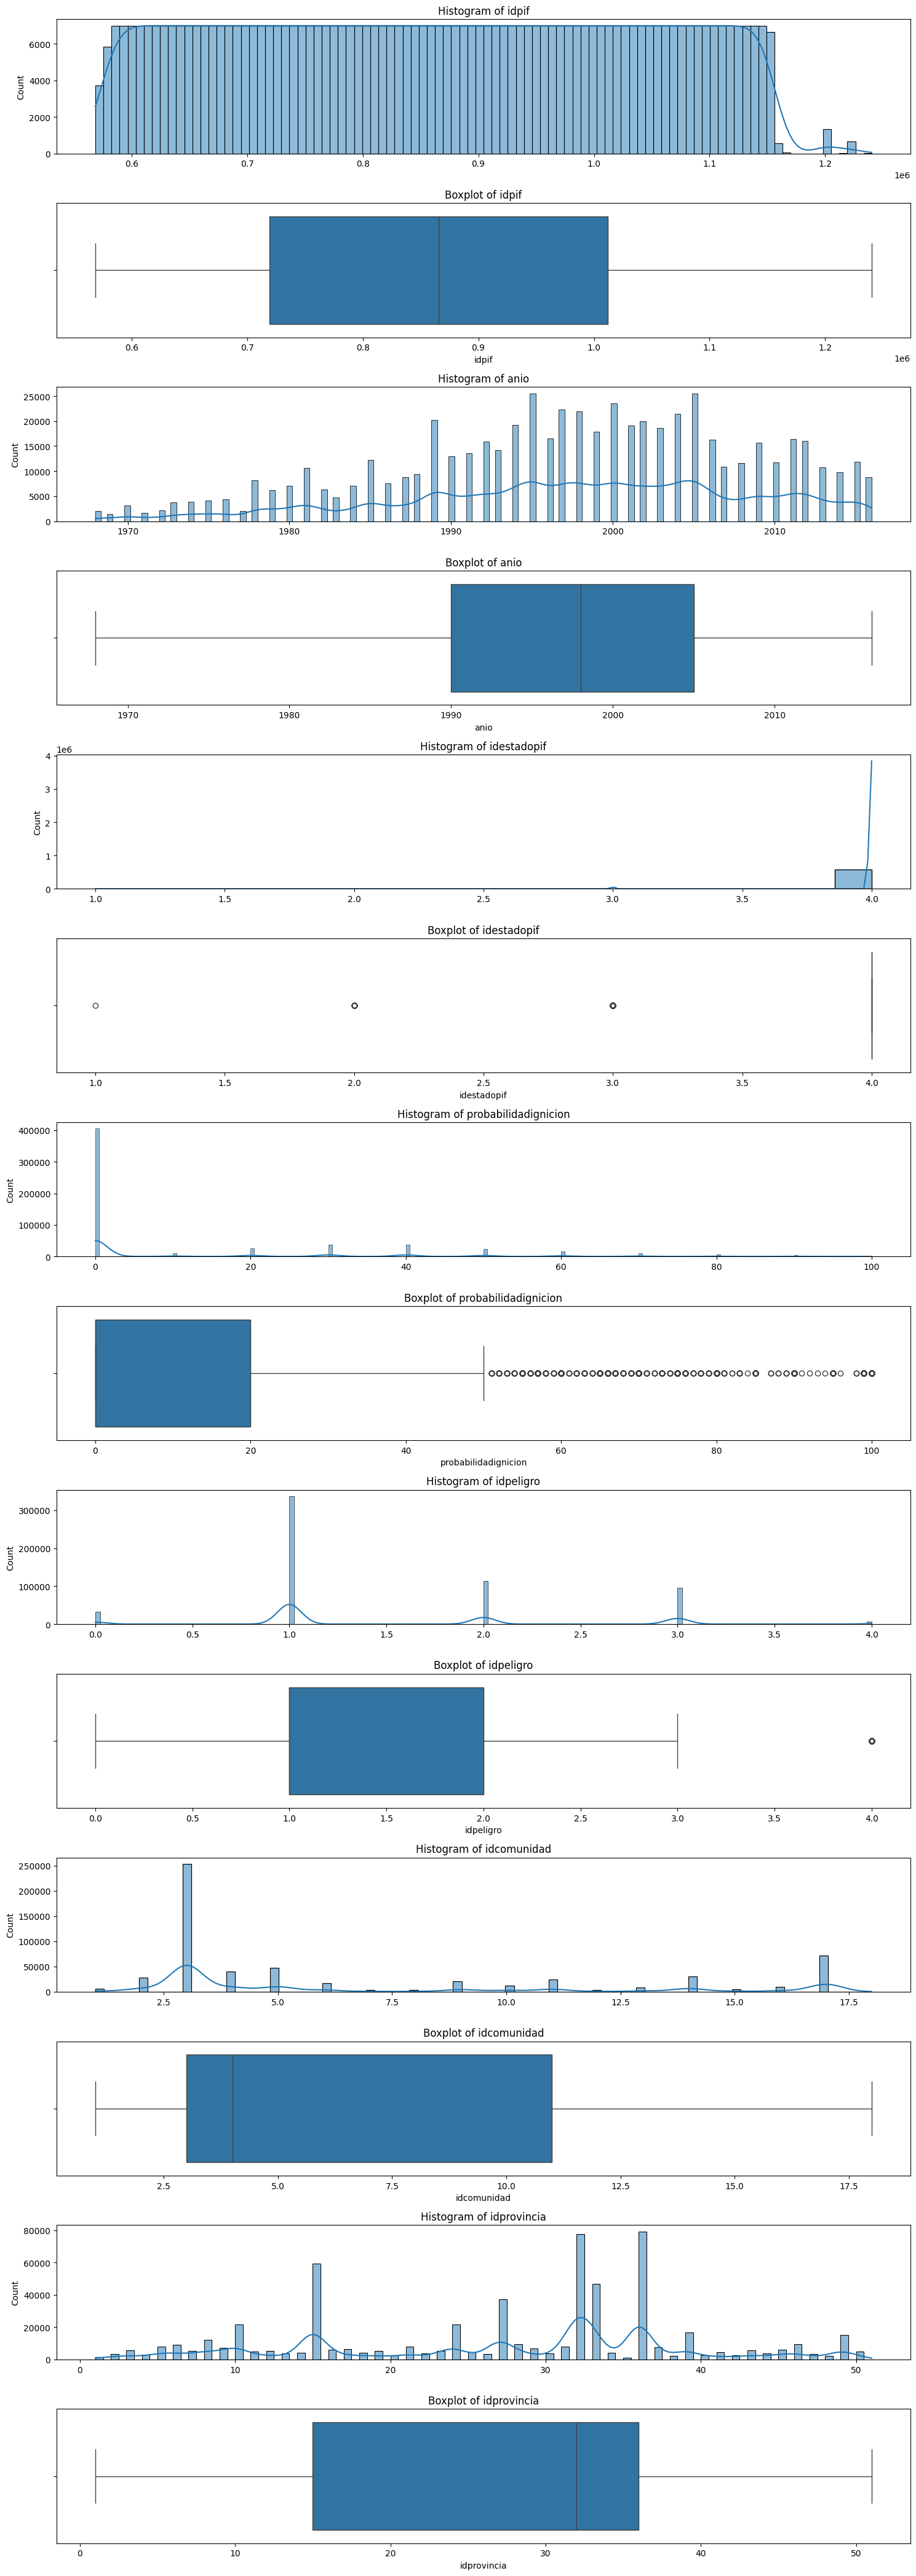

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables to analyze
numerical_vars = ['idpif', 'anio', 'idestadopif', 'probabilidadignicion', 'idpeligro', 'idcomunidad', 'idprovincia']

# Calculate the number of rows needed for subplots
num_vars = len(numerical_vars)
num_rows = num_vars * 2  # Each variable has a histogram and a boxplot

# Create subplots
fig, axis = plt.subplots(num_rows, 1, figsize=(15, num_rows * 3))

# Loop through the variables and plot histograms and boxplots
for i, var in enumerate(numerical_vars):
    sns.histplot(ax=axis[i * 2], data=incendios_reduced, x=var, kde=True).set(
        xlabel=None, title=f"Histogram of {var}"
    )
    sns.boxplot(ax=axis[i * 2 + 1], data=incendios_reduced, x=var).set(
        title=f"Boxplot of {var}"
    )
    axis[i * 2].set_ylabel("Count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables to analyze
numerical_vars = ['deteccion', 'duracion', 'perdidassuperficiales', 
                  'numeromediospersonal', 'numeromediospesados', 
                  'numeromediosaereos', 'intencionado']

# Chunk variables into smaller groups (e.g., 3 variables per figure)
chunk_size = 3
chunks = [numerical_vars[i:i + chunk_size] for i in range(0, len(numerical_vars), chunk_size)]

# Loop through chunks to create separate figures
for chunk_idx, chunk in enumerate(chunks):
    num_rows = len(chunk) * 2  # Each variable has a histogram and a boxplot
    fig, axis = plt.subplots(num_rows, 1, figsize=(15, num_rows * 3))
    
    for i, var in enumerate(chunk):
        sns.histplot(ax=axis[i * 2], data=incendios_reduced, x=var, kde=True).set(
            xlabel=None, title=f"Histogram of {var}"
        )
        sns.boxplot(ax=axis[i * 2 + 1], data=incendios_reduced, x=var).set(
            title=f"Boxplot of {var}"
        )
        axis[i * 2].set_ylabel("Count")
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot or display it
    plt.show()  # Optionally: plt.savefig(f"plot_chunk_{chunk_idx}.png")

: 